In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1: 2].values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
X_train = []
y_train = []
timesteps = 60
for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timesteps: i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

In [17]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.optimizers import SGD

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train, y_train,epochs=1,batch_size=32)

46/46 [==============================] - 25s 271ms/step - loss: 0.0875


In [6]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')

dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs= dataset_total[len(dataset_total)-len(dataset_test)-timesteps:].values

inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

In [7]:
X_test = []
for i in range(60, len(inputs)): 
    X_test.append(inputs[i-60: i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

In [8]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

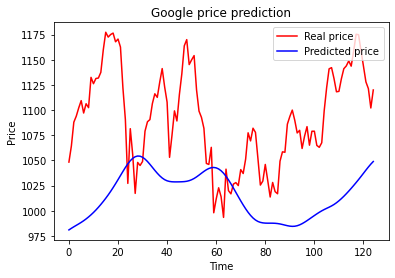

In [9]:
plt.plot(dataset_test.iloc[:, 1: 2].values, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
regressorGRU = Sequential()

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units=1))

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')

regressorGRU.fit(X_train,y_train,epochs=1,batch_size=150)

10/10 [==============================] - 14s 340ms/step - loss: 0.1136


In [20]:
predicted_stock_price = regressorGRU.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

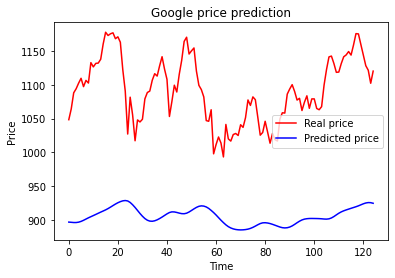

In [21]:
plt.plot(dataset_test.iloc[:, 1: 2].values, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()